In [1]:
import pandas as pd  # For handling data
import numpy as np   # For math stuff
import seaborn as sns  # For pretty charts
import matplotlib.pyplot as plt  # For drawing

# Load the student data
data = pd.read_csv('students.csv')

# See the first few rows
print("Here’s a sneak peek:")
print(data.head())

# How many rows and columns?
print("Size:", data.shape)

# What’s in there?
print("Details:")
data.info()

Here’s a sneak peek:
   gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school  free/reduced   
1  female        group A                 high school      standard   
2    male        group A                 high school      standard   
3    male        group E          associate's degree      standard   
4    male        group D            some high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0               completed          38             70             98  
1               completed          56             98             71  
2               completed          80             47             58  
3               completed          33             17             51  
4                    none          40             15             46  
Size: (1000, 8)
Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Col

In [2]:
print("Any gaps?")
print(data.isnull().sum())

Any gaps?
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


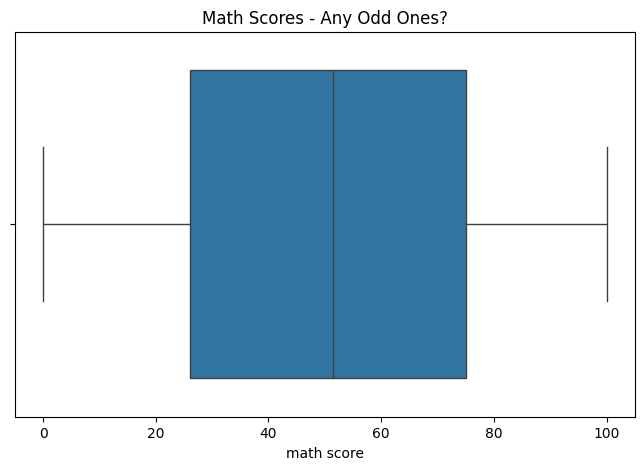

In [3]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['math score'])
plt.title('Math Scores - Any Odd Ones?')
plt.show()

In [4]:
# Find the "normal" range
Q1 = data['math score'].quantile(0.25)
Q3 = data['math score'].quantile(0.75)
IQR = Q3 - Q1
data_clean = data[(data['math score'] >= Q1 - 1.5 * IQR) & (data['math score'] <= Q3 + 1.5 * IQR)]
print("Size after cleaning:", data_clean.shape)

Size after cleaning: (1000, 8)


Skewness (Math Score): -0.033889641841880695


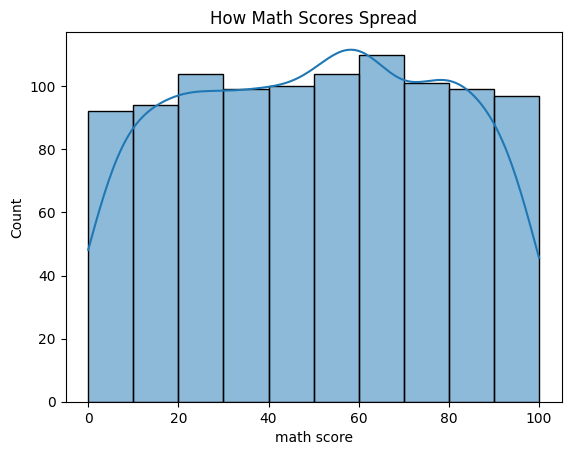

In [5]:
from scipy.stats import skew
print("Skewness (Math Score):", skew(data['math score']))

# Draw a picture
sns.histplot(data['math score'], bins=10, kde=True)
plt.title('How Math Scores Spread')
plt.show()

In [6]:
%pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender_num'] = le.fit_transform(data['gender'])
print("Gender as Numbers:")
print(data[['gender', 'gender_num']].head())

Gender as Numbers:
   gender  gender_num
0    male           1
1  female           0
2    male           1
3    male           1
4    male           1


In [12]:
data = pd.get_dummies(data, columns=['lunch'], prefix='lunch')

KeyError: "None of [Index(['lunch'], dtype='object')] are in the [columns]"

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['math_score_norm'] = scaler.fit_transform(data[['math score']])
print("Math Score (0 to 1):")
print(data['math_score_norm'].head())

Math Score (0 to 1):
0    0.38
1    0.56
2    0.80
3    0.33
4    0.40
Name: math_score_norm, dtype: float64


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['math_score_std'] = scaler.fit_transform(data[['math score']])
print("Math Score (Standard):")
print(data['math_score_std'].head())

Math Score (Standard):
0   -0.430777
1    0.205526
2    1.053930
3   -0.607528
4   -0.360077
Name: math_score_std, dtype: float64


In [15]:
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
print("Average Score:")
print(data['average_score'].head())

Average Score:
0    68.666667
1    75.000000
2    61.666667
3    33.666667
4    33.666667
Name: average_score, dtype: float64


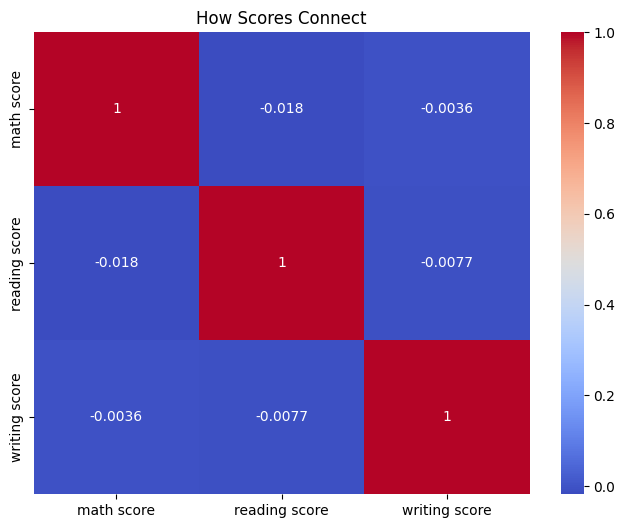

In [16]:
correlation = data[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('How Scores Connect')
plt.show()

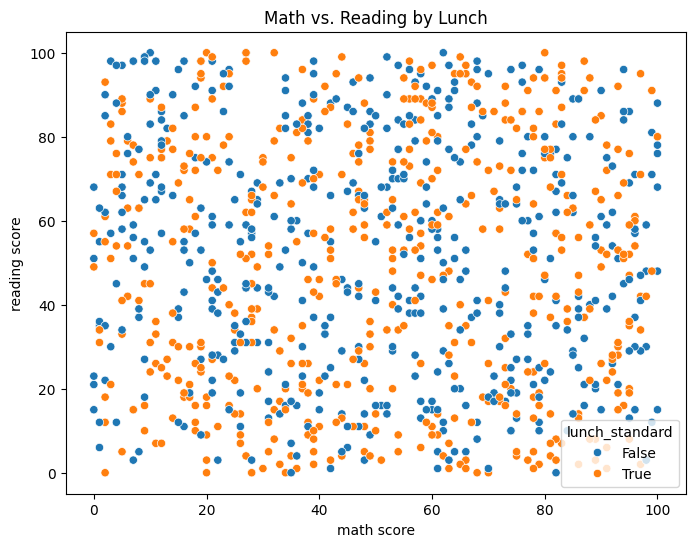

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='reading score', hue='lunch_standard', data=data)
plt.title('Math vs. Reading by Lunch')
plt.show()

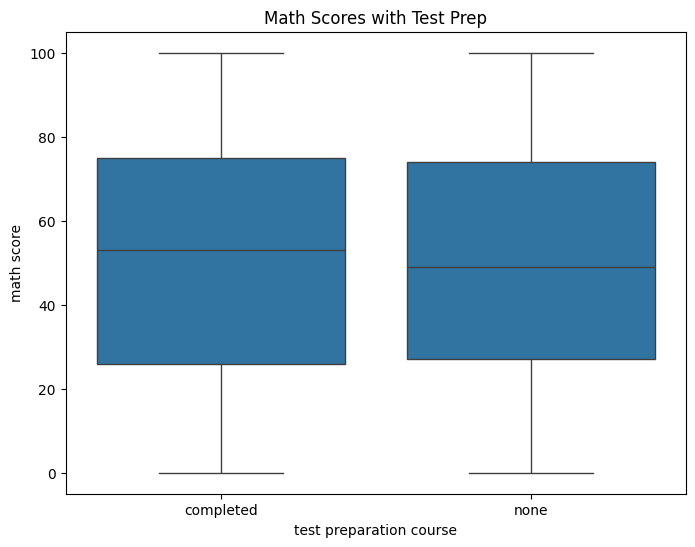

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course', y='math score', data=data)
plt.title('Math Scores with Test Prep')
plt.show()